In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from cftsdata import abr 
from pathlib import Path
import os

In [40]:
mouse_id = 114
time_point = 1
ear = 'right'

In [41]:
import os
print(os.path.abspath('../../../data/practicum-data/ABRpresto data/ABRpresto data/'))


/Users/peeyushpatel/Desktop/data/practicum-data/ABRpresto data/ABRpresto data


In [42]:
# Define paths
source_dir = os.path.abspath(
    "../../../../data/practicum-data/ABRpresto data/ABRpresto data")
destination_dir = os.path.abspath(
    "../../../data/practicum-data/ABRpresto data/processed_data")
output_file = os.path.join(destination_dir, "updated_processed_waveforms.csv")

# Ensure destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Initialize list to store processed data
all_data = []

# Get list of folders in the source directory
folders = [f for f in os.listdir(
    source_dir) if os.path.isdir(os.path.join(source_dir, f))]

In [43]:
filename = Path(f'../../../../data/practicum-data/ABRpresto data/ABRpresto data/Mouse{mouse_id}_timepoint{time_point}_{ear} abr_io').absolute()
print(f'Loading {filename}')

fh = abr.load(filename)
epochs = fh.get_epochs_filtered()

Loading /Users/peeyushpatel/Desktop/Practicum/abranalysis/notebooks/../../../../data/practicum-data/ABRpresto data/ABRpresto data/Mouse114_timepoint1_right abr_io


In [44]:
epochs.head()

time                                   -0.000965     -0.000924     -0.000883  \
frequency level polarity t0                                                    
4000.0    15.0  -1       3.344763   1.633280e-06  1.309234e-06  1.177344e-06   
                         6.626990  -9.302823e-07 -7.171648e-07 -6.613608e-07   
                         9.909217  -2.250002e-06 -1.956992e-06 -1.678884e-06   
                         13.191444 -3.972124e-06 -4.371795e-06 -4.233712e-06   
                         16.473672 -1.891930e-06 -1.865130e-06 -1.847606e-06   

time                                   -0.000842     -0.000801     -0.000760  \
frequency level polarity t0                                                    
4000.0    15.0  -1       3.344763   1.121833e-06  5.922705e-07 -3.793693e-07   
                         6.626990  -7.412865e-07 -6.662515e-07 -1.244554e-07   
                         9.909217  -1.427565e-06 -1.453654e-06 -2.057418e-06   
                         13.191444 -4.087650e-06 -4.004368e-06 -3.736054e-06   
                         16.473672 -1.892977e-06 -1.837575e-06 -1.511990e-06   

time                                   -0.000719     -0.000678     -0.000637  \
frequency level polarity t0                                                    
4000.0    15.0  -1       3.344763  -1.650366e-06 -2.320545e-06 -1.337165e-06   
                         6.626990   5.936864e-07  9.026534e-07  1.092906e-06   
                         9.909217  -1.782551e-06 -3.446421e-07  6.157039e-07   
                         13.191444 -3.569506e-06 -3.551590e-06 -3.058374e-06   
                         16.473672 -1.112239e-06 -7.300911e-07 -3.961360e-07   

time                                   -0.000596  ...      0.008579  \
frequency level polarity t0                       ...                 
4000.0    15.0  -1       3.344763   1.699507e-07  ... -2.722284e-06   
                         6.626990   1.476780e-06  ...  2.416387e-07   
                         9.909217   7.870666e-07  ... -2.359371e-06   
                         13.191444 -2.158808e-06  ...  5.967086e-06   
                         16.473672 -1.834234e-07  ... -1.714941e-06   

time                                    0.008620   0.008661   0.008702  \
frequency level polarity t0                                              
4000.0    15.0  -1       3.344763  -3.796834e-06  -0.000005  -0.000004   
                         6.626990  -6.340871e-07  -0.000001  -0.000002   
                         9.909217  -1.832068e-06  -0.000001  -0.000001   
                         13.191444  7.849969e-06   0.000007   0.000005   
                         16.473672 -2.212278e-06  -0.000002  -0.000002   

time                                 0.008743      0.008784      0.008825  \
frequency level polarity t0                                                 
4000.0    15.0  -1       3.344763   -0.000003 -1.959143e-06 -1.661009e-06   
                         6.626990   -0.000002 -2.451825e-06 -2.689411e-06   
                         9.909217   -0.000001 -6.489187e-07  2.428518e-07   
                         13.191444   0.000004  4.352693e-06  4.334349e-06   
                         16.473672  -0.000002 -1.968926e-06 -1.916298e-06   

time                                    0.008866      0.008907      0.008948  
frequency level polarity t0                                                   
4000.0    15.0  -1       3.344763  -1.683741e-06 -1.746110e-06 -1.460888e-06  
                         6.626990  -2.415832e-06 -1.567231e-06 -4.194526e-07  
                         9.909217   7.141823e-07  3.318958e-07 -7.245764e-07  
                         13.191444  4.099530e-06  4.011559e-06  4.098059e-06  
                         16.473672 -1.762561e-06 -1.408062e-06 -1.006936e-06  

[5 rows x 243 columns]

In [45]:
epochs_mean = epochs.groupby(['frequency', 'level']).mean()

In [46]:
epochs_mean.head()

time                -0.000965     -0.000924     -0.000883     -0.000842  \
frequency level                                                           
4000.0    15.0   1.715328e-07  1.740467e-07  1.354070e-07  8.971846e-08   
          20.0   4.475214e-08  2.001647e-08 -7.773976e-09 -2.937073e-08   
          25.0   7.328854e-08  5.264007e-08  4.621587e-08  4.540906e-08   
          30.0  -1.988324e-07 -1.429375e-07 -9.727467e-08 -7.747239e-08   
          35.0  -1.877107e-08 -6.067831e-09  5.393780e-08  1.510248e-07   

time                -0.000801     -0.000760     -0.000719     -0.000678  \
frequency level                                                           
4000.0    15.0   9.943472e-08  1.046386e-07  6.178975e-08  9.490066e-09   
          20.0  -4.266180e-08 -3.902522e-08  1.300518e-09  7.444146e-08   
          25.0   5.487294e-08  7.055780e-08  7.892654e-08  9.984264e-08   
          30.0  -6.220091e-08 -2.244964e-08  8.835109e-09  1.066240e-08   
          35.0   2.348964e-07  2.741349e-07  2.753304e-07  2.747805e-07   

time                -0.000637     -0.000596  ...      0.008579      0.008620  \
frequency level                              ...                               
4000.0    15.0  -1.688045e-08  2.286212e-09  ... -1.558419e-08 -1.374953e-08   
          20.0   1.431137e-07  1.809998e-07  ... -3.360866e-07 -2.912186e-07   
          25.0   1.447003e-07  1.866996e-07  ... -2.002808e-07 -1.859066e-07   
          30.0   1.839079e-08  3.796237e-08  ... -1.889405e-07 -1.136999e-07   
          35.0   2.928259e-07  3.095023e-07  ...  1.981950e-07  2.032532e-07   

time                 0.008661      0.008702      0.008743      0.008784  \
frequency level                                                           
4000.0    15.0  -1.610815e-08 -1.758800e-08  4.173937e-09  4.051462e-08   
          20.0  -2.352818e-07 -2.001827e-07 -2.217981e-07 -2.650689e-07   
          25.0  -1.830578e-07 -1.565243e-07 -9.130439e-08 -3.602653e-08   
          30.0  -6.511354e-08 -4.650067e-08 -5.060654e-08 -3.732910e-08   
          35.0   2.000511e-07  2.241461e-07  2.505133e-07  2.385356e-07   

time                 0.008825      0.008866      0.008907      0.008948  
frequency level                                                          
4000.0    15.0   5.867861e-08  5.230188e-08  2.611136e-08 -3.425671e-09  
          20.0  -2.844138e-07 -2.620213e-07 -1.982830e-07 -1.070482e-07  
          25.0  -1.859501e-08 -3.352308e-08 -5.736956e-08 -6.648069e-08  
          30.0   4.211572e-09  3.770416e-08  2.784923e-08 -1.821482e-08  
          35.0   2.077303e-07  1.686274e-07  1.243960e-07  8.966526e-08  

[5 rows x 243 columns]

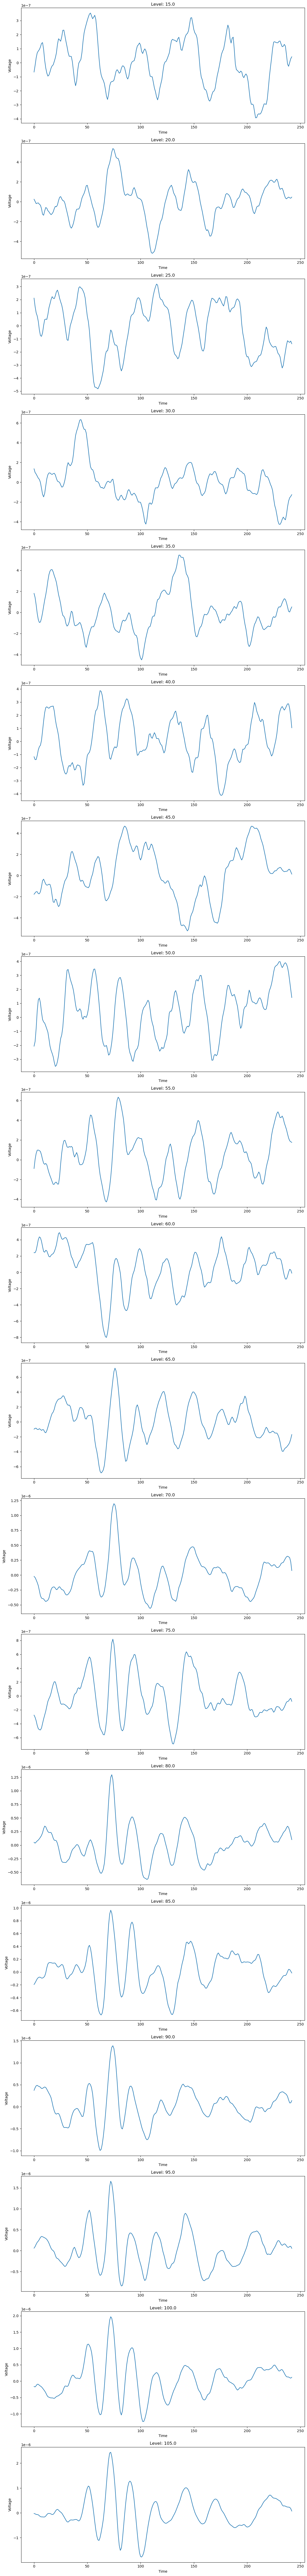

In [56]:
abr_data = []
for (freq, level), group in epochs_mean.iterrows():
    if freq == 16000:  # Your target frequency
        abr_data.append({
            'wave': group.values,  # Replace with actual waveform column
            'level': level
        })

# Convert to DataFrame
abr_lis = pd.DataFrame(abr_data)

# Plot each ABR with its level
plt.figure(figsize=(12, 100))
for i, row in abr_lis.iterrows():
    plt.subplot(len(abr_lis), 1, i+1)
    plt.plot(row['wave'])
    plt.title(f'Level: {row["level"]}')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
plt.tight_layout()
plt.show()


In [48]:
abr_lis.head()

,wave,level
0,"[2.2180914362673916e-08, 9.88581939823685e-09,...",15.0
1,"[6.04260980522365e-08, 5.735106560008178e-08, ...",20.0
2,"[3.004757017499904e-07, 2.482662773745583e-07,...",25.0
3,"[-2.2898058285998897e-07, -2.442563776701928e-...",30.0
4,"[-2.4368691909304554e-07, -2.6770541064923273e...",35.0


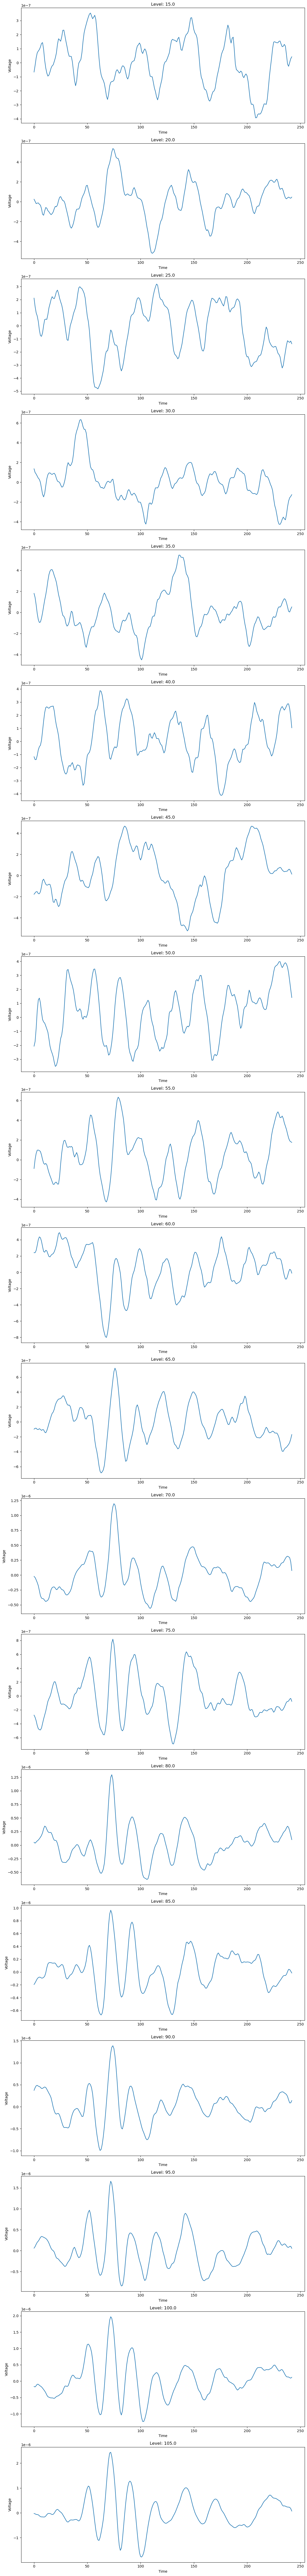

In [49]:
abr_data = []
for (freq, level), group in epochs_mean.iterrows():
    if freq == 16000:  # Your target frequency
        abr_data.append({
            'wave': group.values,  # Replace with actual waveform column
            'level': level
        })

# Convert to DataFrame
abr_lis = pd.DataFrame(abr_data)

# Plot each ABR with its level
plt.figure(figsize=(12, 100))
for i, row in abr_lis.iterrows():
    plt.subplot(len(abr_lis), 1, i+1)
    plt.plot(row['wave'])
    plt.title(f'Level: {row["level"]}')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
plt.tight_layout()
plt.show()

In [50]:
frequency = 16000

In [51]:
filename = f"~/data/practicum-data/ABRpresto data/ABRpresto data csv/Mouse{mouse_id}_timepoint{time_point}_{ear} abr_io {frequency}.csv" 

abr_single_trial_data = pd.read_csv(filename, index_col=[0, 1, 2])

In [52]:
abr_single_trial_data.head()

-0.0009648  -0.0009238399999999987  \
level polarity t0                                              
15.0  -1       2.875873    -0.000004           -4.186057e-06   
               6.158100    -0.000003           -3.002569e-06   
               9.440328    -0.000003           -2.849077e-06   
               12.722555    0.000001           -7.811112e-08   
               16.004782   -0.000002           -1.960266e-06   

                          -0.0008828799999999991  -0.0008419199999999995  \
level polarity t0                                                          
15.0  -1       2.875873                -0.000004               -0.000003   
               6.158100                -0.000004               -0.000004   
               9.440328                -0.000002               -0.000001   
               12.722555               -0.000002               -0.000003   
               16.004782               -0.000003               -0.000003   

                          -0.0008009599999999999  -0.0007599999999999985  \
level polarity t0                                                          
15.0  -1       2.875873            -3.655598e-06           -3.898003e-06   
               6.158100            -3.952289e-06           -3.128219e-06   
               9.440328            -8.490667e-07           -3.643697e-07   
               12.722555           -2.674576e-06           -2.458676e-06   
               16.004782           -2.622312e-06           -1.498307e-06   

                          -0.0007190399999999989  -0.0006780799999999993  \
level polarity t0                                                          
15.0  -1       2.875873            -3.803856e-06           -3.553606e-06   
               6.158100            -2.313198e-06           -1.930964e-06   
               9.440328             3.696077e-08            2.321255e-07   
               12.722555           -2.199963e-06           -1.912801e-06   
               16.004782           -6.960327e-07           -2.236930e-07   

                          -0.0006371199999999997  -0.0005961600000000001  ...  \
level polarity t0                                                         ...   
15.0  -1       2.875873            -3.394733e-06           -3.286871e-06  ...   
               6.158100            -2.045450e-06           -2.215401e-06  ...   
               9.440328             3.330394e-07            3.460906e-07  ...   
               12.722555           -1.748376e-06           -1.457731e-06  ...   
               16.004782           -2.288536e-08            4.123395e-08  ...   

                            0.00857888    0.00861984     0.0086608  \
level polarity t0                                                    
15.0  -1       2.875873  -3.104686e-06 -2.524135e-06 -2.310986e-06   
               6.158100   5.043996e-06  4.304440e-06  3.633306e-06   
               9.440328  -2.058186e-06 -5.959372e-07  9.728980e-07   
               12.722555  2.422080e-08  5.308908e-07  9.537462e-07   
               16.004782  4.724891e-07  1.865201e-06  2.781728e-06   

                            0.00870176  0.008742719999999999  \
level polarity t0                                              
15.0  -1       2.875873  -2.602419e-06             -0.000003   
               6.158100   2.928377e-06              0.000002   
               9.440328   1.717036e-06              0.000002   
               12.722555  9.724816e-07              0.000001   
               16.004782  3.342079e-06              0.000003   

                          0.008783680000000002  0.008824640000000002  \
level polarity t0                                                      
15.0  -1       2.875873              -0.000003         -2.228294e-06   
               6.158100               0.000002          1.335457e-06   
               9.440328               0.000001          8.622346e-07   
               12.722555              0.000002          2.015909e-06   
               16.004782              

In [53]:
# from epochs, get all the data for the specified frequency
epochs_filtered = epochs.loc[frequency]

In [54]:
epochs_filtered.head()

time                      -0.000965     -0.000924  -0.000883  -0.000842  \
level polarity t0                                                         
15.0  -1       2.875873   -0.000004 -4.186057e-06  -0.000004  -0.000003   
               6.158100   -0.000003 -3.002569e-06  -0.000004  -0.000004   
               9.440328   -0.000003 -2.849077e-06  -0.000002  -0.000001   
               12.722555   0.000001 -7.811112e-08  -0.000002  -0.000003   
               16.004782  -0.000002 -1.960266e-06  -0.000003  -0.000003   

time                         -0.000801     -0.000760     -0.000719  \
level polarity t0                                                    
15.0  -1       2.875873  -3.655598e-06 -3.898003e-06 -3.803856e-06   
               6.158100  -3.952289e-06 -3.128219e-06 -2.313198e-06   
               9.440328  -8.490667e-07 -3.643697e-07  3.696077e-08   
               12.722555 -2.674576e-06 -2.458676e-06 -2.199963e-06   
               16.004782 -2.622312e-06 -1.498307e-06 -6.960327e-07   

time                         -0.000678     -0.000637     -0.000596  ...  \
level polarity t0                                                   ...   
15.0  -1       2.875873  -3.553606e-06 -3.394733e-06 -3.286871e-06  ...   
               6.158100  -1.930964e-06 -2.045450e-06 -2.215401e-06  ...   
               9.440328   2.321255e-07  3.330394e-07  3.460906e-07  ...   
               12.722555 -1.912801e-06 -1.748376e-06 -1.457731e-06  ...   
               16.004782 -2.236930e-07 -2.288536e-08  4.123395e-08  ...   

time                          0.008579      0.008620      0.008661  \
level polarity t0                                                    
15.0  -1       2.875873  -3.104686e-06 -2.524135e-06 -2.310986e-06   
               6.158100   5.043996e-06  4.304440e-06  3.633306e-06   
               9.440328  -2.058186e-06 -5.959372e-07  9.728980e-07   
               12.722555  2.422080e-08  5.308908e-07  9.537462e-07   
               16.004782  4.724891e-07  1.865201e-06  2.781728e-06   

time                          0.008702   0.008743   0.008784      0.008825  \
level polarity t0                                                            
15.0  -1       2.875873  -2.602419e-06  -0.000003  -0.000003 -2.228294e-06   
               6.158100   2.928377e-06   0.000002   0.000002  1.335457e-06   
               9.440328   1.717036e-06   0.000002   0.000001  8.622346e-07   
               12.722555  9.724816e-07   0.000001   0.000002  2.015909e-06   
               16.004782  3.342079e-06   0.000003   0.000003  2.803954e-06   

time                          0.008866      0.008907      0.008948  
level polarity t0                                                   
15.0  -1       2.875873  -1.777318e-06 -1.417404e-06 -8.585786e-07  
               6.158100   1.001515e-06  1.139817e-06  1.493334e-06  
               9.440328   5.416975e-07  2.559776e-07 -2.950296e-07  
               12.722555  1.740215e-06  1.035183e-06  2.032034e-07  
               16.004782  2.750444e-06  2.337179e-06  1.252066e-06  

[5 rows x 243 columns]

In [55]:
# Make all the float columns in epochs_filtered to be integers
epochs_filtered = epochs_filtered.astype(int)

# Take just these values of the epochs_filtered and abr_single_trial_data and compare them
# to see if they are the same
epochs_filtered_values = epochs_filtered.values 
abr_single_trial_data_values = abr_single_trial_data.values

# Check how close the values are
np.allclose(epochs_filtered_values, abr_single_trial_data_values)


False